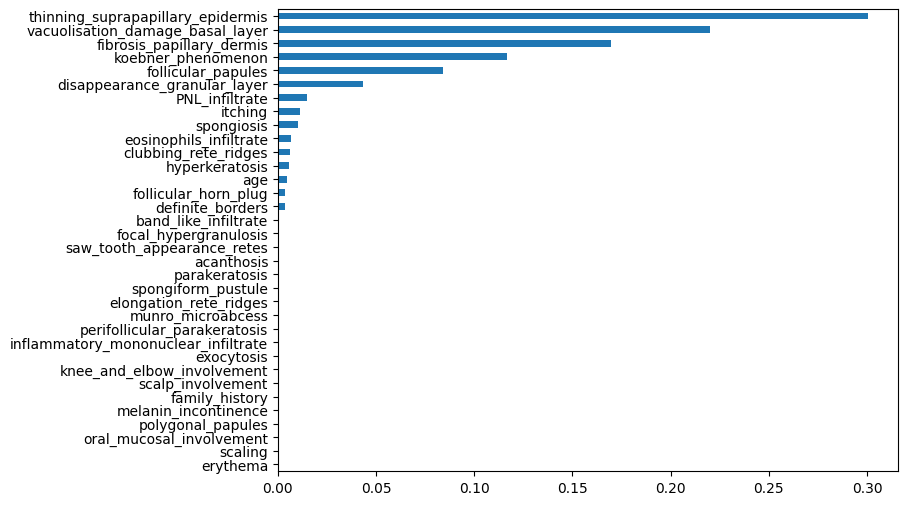

In [ ]:
# fazendo gráfico para ver a importancia as colunas

from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('../dermatology_database_1.csv').dropna()

# ==============  OPÇÕES PARA VALORES DIFERENTES DE INT ===========

# print(df.dtypes) # mostra o tipo de cada col 

# # remover
# df_numerico = df.select_dtypes(exclude=['object'])

# # transformar em int

lb = LabelEncoder()
df["age"] = lb.fit_transform(df["age"])

# ================ fazendo gráfico para avaliar a importancia as colunas ======================

X = df.drop(columns=["class"])  # Substitua pelo nome da sua coluna alvo
Y = df["class"]

modelo = DecisionTreeClassifier().fit(X, Y)
importances = pd.Series(modelo.feature_importances_, index=X.columns)

importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.show()

# Definir um limite (exemplo: menos de 0.01 de importância)
limite = 0.01
colunas_baixa_importancia = importances[importances < limite].index.tolist()




In [ ]:

# retirnado colunas e baixa importancia

df = df.drop(columns=colunas_baixa_importancia)

X = df.drop(['class'], axis = 1)
Y = df['class']

In [ ]:
# fazendo ensemble modelos




from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Gerando dados
X, Y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Modelos base
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Meta-modelo
stacking = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Treinar e testar
stacking.fit(X_train, y_train)
print(f"Acurácia: {stacking.score(X_test, y_test):.4f}")

# bagging + knn + decision tree

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=10, random_state=42
)
bagging.fit(X_train, y_train)
print(f"Acurácia: {bagging.score(X_test, y_test):.4f}")

#  Boosting com AdaBoost + Extra Trees

from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

boosting = AdaBoostClassifier(
    base_estimator=ExtraTreesClassifier(n_estimators=50, max_depth=4, random_state=42),
    n_estimators=50, random_state=42
)
boosting.fit(X_train, y_train)
print(f"Acurácia: {boosting.score(X_test, y_test):.4f}")


# bosting com ada boster e qualquer outro modelo


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Definir o modelo base (pode ser qualquer um)
modelo_base = DecisionTreeClassifier(max_depth=3)  # Troque por KNeighborsClassifier() ou outro

# Criar o Boosting
modelo_boosting = AdaBoostClassifier(base_estimator=modelo_base, n_estimators=50, random_state=42)

# Treinar
modelo_boosting.fit(X_train, y_train)

# Testar
print(f"Acurácia: {modelo_boosting.score(X_test, y_test):.4f}")



KeyboardInterrupt: 

In [ ]:
# calcular métricas

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


print(f"Acurácia: {accuracy_score(y_test, y_pred):.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [ ]:
# criano matrzz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

# Criar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Classe 0", "Classe 1"], yticklabels=["Classe 0", "Classe 1"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

In [ ]:
#  gráfico de precisão vs real

plt.figure(figsize=(6,4))
plt.scatter(range(len(y_test)), y_test, color="blue", label="Real", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Previsto", alpha=0.6)
plt.xlabel("Amostras")
plt.ylabel("Classe")
plt.title("Valores Reais vs Previstos")
plt.legend()
plt.show()

In [ ]:
# curva roc e auc para classificação binária
# y_prob = modelo_boosting.predict_proba(X_test)[:, 1]

# # Calcular ROC
# fpr, tpr, _ = roc_curve(y_test, y_prob)
# roc_auc = auc(fpr, tpr)

# # Plotar curva ROC
# plt.figure(figsize=(6,4))
# plt.plot(fpr, tpr, color="blue", label=f'Área sob a curva (AUC = {roc_auc:.4f})')
# plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Linha de referência
# plt.xlabel("Falsos Positivos")
# plt.ylabel("Verdadeiros Positivos")
# plt.title("Curva ROC")
# plt.legend()
# plt.show()